In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def check_activation(output):
    if output >= 0:
        return 1
    else:
        return 0

def testing_prediction(testin_values,weights,bias):
    predictions = []
    weighted_sum = np.dot(testin_values,weights) + bias
    print("Weighted Sum : ",weighted_sum)
    predictions.append(check_activation(weighted_sum))
    return predictions

def training_predictions(inputs,labels):
    epochs = 1000
    bias = 1
    weights = np.random.rand(2)
    weighted_sum = 0
    learning_rate = 0.1

    for epoch in range(epochs):
        for j in range(len(inputs)):
            weighted_sum = np.dot(inputs[j],weights) + bias
            predict = check_activation(weighted_sum)
            error = labels[j] - predict
            weights = weights + learning_rate*(error)*inputs[j]
            bias = bias + learning_rate*error

    return weights,bias

In [7]:
inputs = np.array([[1,1],[2,2],[4,4],[5,5]])
labels = np.array([0,0,1,1])

In [8]:
weights,bias = training_predictions(inputs,labels)
print(weights)
print(bias)

[-0.07362493  0.11860453]
-0.09999999999999987


In [9]:
test = [6,2]
print(testing_prediction(test,weights,bias))

Weighted Sum :  -0.30454053885407184
[0]


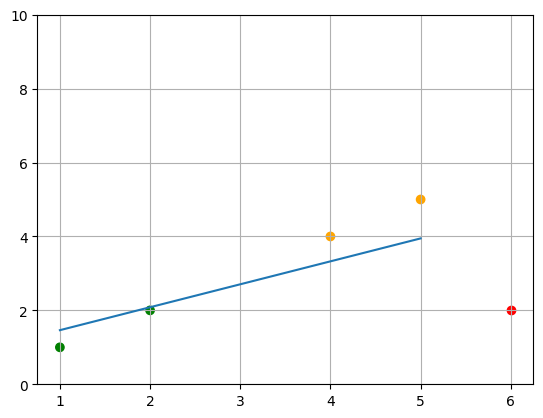

In [10]:
df = pd.DataFrame(inputs,columns=['X','Y'])
x = df['X']
y = (-weights[0]/weights[1])*df['X'] - (bias/weights[1])

fig, ax = plt.subplots()
colors = np.where(df['Y'] > y, 'orange', 'green')
ax.plot(x, y)
ax.set_ylim(0, 10)
plt.scatter(x=6,y=2,color='red')
plt.scatter(x=df['X'],y=df['Y'],c = colors)
plt.grid(True)
plt.show()